In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train=pd.read_csv("C:\\Sridhar\\AI_ML\\Algorithms\\datasets\\house-prices-advanced-regression-techniques\\train.csv")
df_holdout=pd.read_csv("C:\\Sridhar\\AI_ML\\Algorithms\\datasets\\house-prices-advanced-regression-techniques\\test.csv")

In [3]:
df_train.shape,df_holdout.shape

((1460, 81), (1459, 80))

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
 def memoryManagement(base_dataset):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    df=base_dataset
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))    
    return df

In [6]:
df_train=memoryManagement(df_train)

Memory usage of dataframe is 0.90 MB
Memory usage after optimization is: 0.16 MB
Decreased by 81.7%


In [7]:
df_holdout=memoryManagement(df_holdout)

Memory usage of dataframe is 0.89 MB
Memory usage after optimization is: 0.16 MB
Decreased by 81.7%


In [8]:
y = df_train['SalePrice']

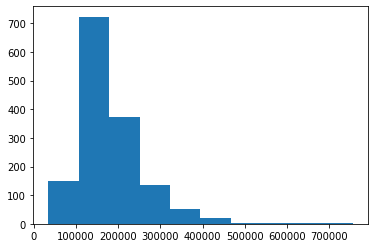

In [9]:
plt.hist(y)
plt.show()

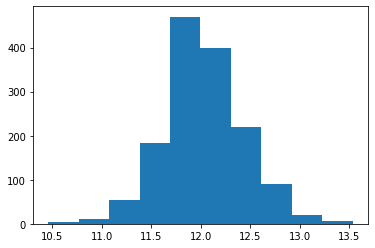

In [13]:
import math
# plt.hist(math.)
plt.hist(np.log(y.values))
plt.show()

In [14]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int32

In [15]:
def null_values(base_dataset):
    print(base_dataset.isna().sum())
    # null value percentage     
    null_value_table=(base_dataset.isna().sum()/base_dataset.shape[0])*100
    # null value percentage beyond threshold drop , else treat the columns 
    
    retained_columns=null_value_table[null_value_table<int(input())].index
    #if any variable as null value greater than input(like 30% of the data) 
    #value than those variable are consider as drop
    drop_columns=null_value_table[null_value_table>int(input())].index
    base_dataset.drop(drop_columns,axis=1,inplace=True)
    len(base_dataset.isna().sum().index)
    cont=base_dataset.describe().columns
    cat=[i for i in base_dataset.columns if i not in base_dataset.describe().columns]
    for i in cat:
        base_dataset[i].fillna(base_dataset[i].value_counts().index[0],inplace=True)
    for i in cont:
        base_dataset[i].fillna(base_dataset[i].median(),inplace=True)
    print(base_dataset.isna().sum())
    return base_dataset,cat,cont

In [16]:
train_dataset,cat_1,cont_1 = null_values(df_train)

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [17]:
test_dataset,cat_2,cont_2 = null_values(df_holdout)

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

In [18]:
train_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [19]:
from sklearn.preprocessing import LabelEncoder
for i in cat_1:
    le=LabelEncoder()
    le.fit(train_dataset[i].astype(str))
    t=le.transform(train_dataset[i].astype(str))
    train_dataset[i]=t

In [20]:
train_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000


In [21]:
for i in cat_2:
    le=LabelEncoder()
    le.fit(test_dataset[i].astype(str))
    t=le.transform(test_dataset[i].astype(str))
    test_dataset[i]=t

In [22]:
test_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,80.0,11622,1,3,3,0,4,...,0,0,0,120,0,0,6,2010,8,4
1,1462,20,3,81.0,14267,1,0,3,0,0,...,36,0,0,0,0,12500,6,2010,8,4
2,1463,60,3,74.0,13830,1,0,3,0,4,...,34,0,0,0,0,0,3,2010,8,4
3,1464,60,3,78.0,9978,1,0,3,0,4,...,36,0,0,0,0,0,6,2010,8,4
4,1465,120,3,43.0,5005,1,0,1,0,4,...,82,0,0,144,0,0,1,2010,8,4


In [23]:
def outliers_transform(base_dataset):
    for i in base_dataset.var().sort_values(ascending=False).index[1:10]:
        x=np.array(base_dataset[i])
        qr1=np.quantile(x,0.25)
        qr3=np.quantile(x,0.75)
        iqr=qr3-qr1
        utv=qr3+(1.5*(iqr))
        ltv=qr1-(1.5*(iqr))
        y=[]
        """Based on clients input(ltv,utv) run the below code """
        for p in x:
            if p <ltv or p>utv:
                y.append(np.median(x))
            else:
                y.append(p)
        base_dataset[i]=y
        return base_dataset

In [24]:
train_dataset = outliers_transform(train_dataset)

In [25]:
train_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450.0,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600.0,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250.0,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550.0,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260.0,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000


In [26]:
test_dataset = outliers_transform(test_dataset)

In [27]:
storeIds=test_dataset['Id']

In [28]:
storeIds.shape

(1459,)

In [29]:
train_dataset.drop('Id',axis=1,inplace=True)

In [30]:
test_dataset.drop('Id',axis=1,inplace=True)

In [31]:
y = train_dataset['SalePrice']

In [32]:
x = train_dataset.drop('SalePrice',axis=1)

In [33]:
x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450.0,1,3,3,0,4,0,...,61,0,0,0,0,0,2,2008,8,4
1,20,3,80.0,9600.0,1,3,3,0,2,0,...,0,0,0,0,0,0,5,2007,8,4
2,60,3,68.0,11250.0,1,0,3,0,4,0,...,42,0,0,0,0,0,9,2008,8,4
3,70,3,60.0,9550.0,1,0,3,0,0,0,...,35,272,0,0,0,0,2,2006,8,0
4,60,3,84.0,14260.0,1,0,3,0,2,0,...,84,0,0,0,0,0,12,2008,8,4


In [34]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int32

In [41]:
from sklearn.linear_model import LinearRegression
le = LinearRegression()
le.fit(x,y)
predict_y=le.predict(test_dataset)
predict_y

array([107303.5008366 , 160918.86061077, 173923.8463993 , ...,
       159741.73709248, 118062.32318533, 247342.08351006])

In [50]:
from sklearn.linear_model import LinearRegression
ln = LinearRegression()
ln.fit(x,y)
predict_y_for_ln=ln.predict(x)
predict_y_for_ln

array([215121.91192573, 199479.92190087, 223436.65303481, ...,
       248112.69748197, 154184.09380716, 157408.87318028])

In [51]:
predict_y_for_ln.shape,y.shape

((1460,), (1460,))

In [56]:
error_ln = abs(y - predict_y_for_ln)

In [57]:
error.sum()

27297888.222269617

In [54]:
from sklearn.linear_model import Ridge
rg = Ridge()
rg.fit(x,y)
predict_y_for_rg=rg.predict(x)
predict_y_for_rg

array([215109.64093905, 199265.81357603, 223633.35025496, ...,
       248066.52059802, 153739.44937996, 157459.8326603 ])

In [58]:
predict_y_for_rg.shape,y.shape

((1460,), (1460,))

In [59]:
error_rg = abs(y - predict_y_for_rg)

In [61]:
error_rg.sum()

27295735.396737024

In [66]:
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(x,y)
predict_y_for_ls=ls.predict(x)
predict_y_for_ls

array([215117.52771646, 199442.28503593, 223450.95422646, ...,
       248096.03603172, 154140.80788126, 157421.72317718])

In [67]:
predict_y_for_ls.shape,y.shape

((1460,), (1460,))

In [68]:
error_ls = abs(y - predict_y_for_ls)

In [70]:
error_ls.sum()

27295485.227463014

In [71]:
from sklearn.linear_model import ElasticNet
el = ElasticNet()
el.fit(x,y)
predict_y_for_el=el.predict(x)
predict_y_for_el

C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 809907488056.3525, tolerance: 920791133.4609977
  positive)


array([213276.15124972, 196101.39580392, 226607.65443417, ...,
       231038.67508127, 149408.9709268 , 162624.97931172])

In [72]:
predict_y_for_el.shape,y.shape

((1460,), (1460,))

In [73]:
error_el = abs(y - predict_y_for_el)

In [74]:
error_el.sum()

27146583.46182812

In [76]:
from sklearn.metrics import r2_score

In [78]:
r2_score(y,predict_y_for_el)

0.8370307395828898

In [87]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Break into left and right hand side; y and X
Y, X = dmatrices(formula="SalePrice ~ MSSubClass + MSZoning + LotFrontage + LotArea + LotConfig + RoofStyle ", data=df_train, return_type="dataframe")

# For each Xi, calculate VIF
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Fit X to y
result = sm.OLS(Y, X).fit()

TypeError: dmatrices() got an unexpected keyword argument 'formula'

In [84]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [164]:
from sklearn.linear_model import LogisticRegression
le = LogisticRegression()
le.fit(x,y)
predict_logisticRegression = le.predict(test_dataset)
predict_logisticRegression

C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([156000, 158000, 215000, ..., 412500, 134500, 187500])

In [165]:
predict_logisticRegression.shape

(1459,)

In [166]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

In [167]:
dt=DecisionTreeRegressor()
dt.fit(x,y)
dt.predict(x)
predict_decissionTree=dt.predict(test_dataset)
predict_decissionTree

array([128500., 155000., 173000., ..., 139000., 108000., 222000.])

In [168]:
predict_decissionTree.shape

(1459,)

In [169]:
dt=RandomForestRegressor()
dt.fit(x,y)
dt.predict(x)
predict_randomForest = dt.predict(test_dataset)
predict_randomForest

C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([116075.8, 164150. , 172950. , ..., 157560. ,  96890. , 226997.8])

In [170]:
predict_randomForest.shape

(1459,)

In [171]:
dt=BaggingRegressor()
dt.fit(x,y)
dt.predict(x)
predict_bagging = dt.predict(test_dataset)
predict_bagging

array([121422.1, 155125. , 184750. , ..., 159650. , 111285. , 232067.8])

In [172]:
predict_bagging.shape

(1459,)

In [173]:
type(predict_bagging)

numpy.ndarray

In [174]:
average_prediction = pd.DataFrame([predict_linearRegression,predict_logisticRegression,predict_decissionTree,predict_randomForest,predict_bagging]).T

In [175]:
average_prediction

,0,1,2,3,4
0,107303.500837,156000.0,128500.0,116075.8,121422.1
1,160918.860611,158000.0,155000.0,164150.0,155125.0
2,173923.846399,215000.0,173000.0,172950.0,184750.0
3,180027.770944,215000.0,177500.0,181828.5,191090.0
4,184630.391163,171000.0,229456.0,187740.0,200490.0
5,171336.987586,181000.0,177500.0,181420.0,185470.0
6,182490.795892,215000.0,140000.0,167149.0,171950.0
7,157778.628729,185000.0,177500.0,180570.0,175130.0
8,196665.306509,260000.0,189000.0,172183.5,181840.0
9,106575.045510,185000.0,120500.0,120300.0,119310.0


In [177]:
average_prediction.mean(axis=1)

0       125860.280167
1       158638.772122
2       183924.769280
3       189089.254189
4       194663.278233
5       179345.397517
6       175317.959178
7       175195.725746
8       199937.761302
9       130337.009102
10      203817.704820
11       91793.865831
12       92667.618260
13      147044.104922
14      136230.845997
15      344481.617164
16      244140.358105
17      289391.220786
18      249277.265840
19      405459.612059
20      287069.492310
21      208766.901823
22      179391.355779
23      178882.375394
24      190726.653825
25      203201.266668
26      328564.818918
27      244824.940803
28      212805.073053
29      208621.693722
            ...      
1429     89533.851325
1430    134877.254712
1431     60846.384440
1432    100416.163763
1433     66633.830669
1434    329634.842686
1435    266210.280040
1436    249518.023333
1437    151217.069414
1438    236894.618751
1439    151138.259206
1440    242990.553633
1441    201419.539990
1442    296736.211371
1443    36

In [179]:
pd.DataFrame([ids,average_prediction.mean(axis=1)]).T.to_csv("final_submission_home_prices.csv")